<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 75 width=200 alt=" ">

# House Price  

**Descripción:** Este programa predice los precios de las casas en base a su locación, habitación, baños y metros cuadrados

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|11 de junio 2020|


### Contenido:  
1. [Librerias a utilizar](#Librerias)
1. [Cargar de los datos](#Load-dataset)
1. [información General](#Informacion-General-del-Dataset)
1. [verificar datos nulos](#Verificar-datos-nulos)
1. [Eliminar columnas](#Eliminar-columnas)
1. [Data cleaning](#Data-cleaning:)
1. [Feature Engineering](#Feature-Engineering)
1. [Salvar archivo](#Guardar-dataset-cleaning)
1. [Reducción Dimensiones columna locatioon](Reduccion-de-la-dimensiones)
1. [Verificar dimesnión de los datos](#Distribucion-de-los-datos)
1. [Dummies](#Get-Dummies)
1. [Variables (X-y)](#Variables-dependiente-e-independiente)
1. [Dividir datos en training and test](#Spit-the-data)
1. [Modelos](#Modelos)
    1. [LinearRegressor](#LinearRegression)
    1. [Rigde](#Rigde)
    1. [Lasso](#Lasso)
    1. [xgboost](#xgboost)
1. [Evaluación de los modelos](#Evaluacion-de-modelos)
1. [Guardar modelo](#Guardar-el-modelo)

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### Load dataset

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

###  Informacion General del Dataset

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### Verificar datos nulos

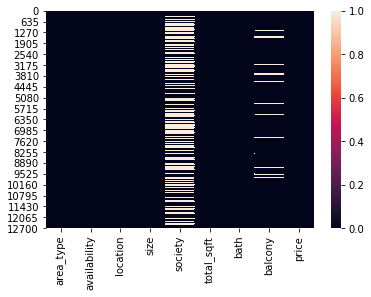

In [8]:
sns.heatmap(df.isna())

In [9]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Eliminar columnas 

In [10]:
df.drop(['area_type','society','balcony','availability'],axis='columns', inplace=True)

### Data cleaning:  

1. [ ] Datos nulos
1. [ ] columnas con valores de objetos

In [13]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df[df['location'].isnull()]

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,3.0,86.0


In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df['size']= df['size'].str.replace('BHK', ' ').str.replace('Bedroom', '')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df['size']= df['size'].str.replace('RK', ' ')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df['size'].unique()

array(['2  ', '4 ', '3  ', '4  ', '6 ', '3 ', '1  ', '1 ', '8 ', '2 ',
       '7 ', '5  ', '7  ', '6  ', '5 ', '11  ', '9  ', '9 ', '27  ',
       '10 ', '11 ', '10  ', '19  ', '16  ', '43 ', '14  ', '8  ', '12 ',
       '13  ', '18 '], dtype=object)

In [20]:
# dividir en dos columnas

df[['t_sqft', 'elim']] = df.total_sqft.str.split('-', expand= True)

In [21]:
df.head()

,location,size,total_sqft,bath,price,t_sqft,elim
0,Electronic City Phase II,2,1056,2.0,39.07,1056,None
1,Chikka Tirupathi,4,2600,5.0,120.00,2600,None
2,Uttarahalli,3,1440,2.0,62.00,1440,None
3,Lingadheeranahalli,3,1521,3.0,95.00,1521,None
4,Kothanur,2,1200,2.0,51.00,1200,None


In [22]:
df['size'] = df.size.astype('int')

In [23]:
df['t_sqft'] = pd.to_numeric(df.t_sqft, errors='coerce')

In [24]:
df.drop('elim', axis = 'columns', inplace=True) 

In [25]:
df = df.dropna()

In [26]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
t_sqft        0
dtype: int64

### Feature Engineering

In [27]:
#crear columna de precio por sqft

df['price_per_sqqft'] = (df.price/df.t_sqft)*100000
df.head()

,location,size,total_sqft,bath,price,t_sqft,price_per_sqqft
0,Electronic City Phase II,92722,1056,2.0,39.07,1056.0,3699.810606
1,Chikka Tirupathi,92722,2600,5.0,120.00,2600.0,4615.384615
2,Uttarahalli,92722,1440,2.0,62.00,1440.0,4305.555556
3,Lingadheeranahalli,92722,1521,3.0,95.00,1521.0,6245.890861
4,Kothanur,92722,1200,2.0,51.00,1200.0,4250.000000


### Reduccion de la dimensiones

In [28]:
df['location'] = df.location.apply(lambda x: x.strip())

In [29]:
location_stats= df.location.value_counts()
location_stats

Whitefield                 533
Sarjapur  Road             392
Electronic City            304
Kanakpura Road             264
Thanisandra                235
                          ... 
Jagadish Nagar               1
Hosahalli                    1
Mathikere SBM colony         1
1Hoysalanagar                1
mvj engineering college      1
Name: location, Length: 1287, dtype: int64

In [30]:
#menor o igual a 10
location_stats_less_than_10 = location_stats[location_stats<=10]
len(location_stats[location_stats<=10])

1047

In [31]:
df['location'] = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location)

13200

In [33]:
len(df.location.unique())

241

### Distribucion de los datos

In [34]:
df[df.t_sqft/df.bath<300].head()

,location,size,total_sqft,bath,price,t_sqft,price_per_sqqft
9,other,92722,1020,6.0,370.0,1020.0,36274.509804
45,HSR Layout,92722,600,9.0,200.0,600.0,33333.333333
68,Devarachikkanahalli,92722,1350,7.0,85.0,1350.0,6296.296296
70,other,92722,500,3.0,100.0,500.0,20000.000000
84,EPIP Zone,92722,1499,5.0,102.0,1499.0,6804.536358


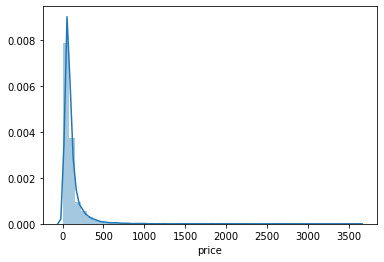

In [35]:
sns.distplot(df.price)

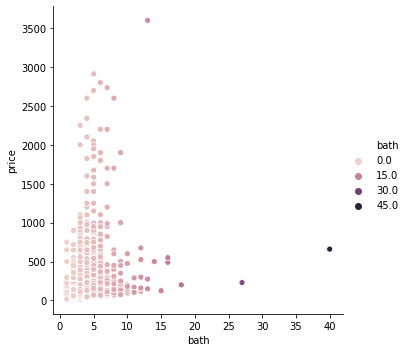

In [36]:
sns.relplot(x = 'bath', y = 'price', data = df, hue = 'bath' )

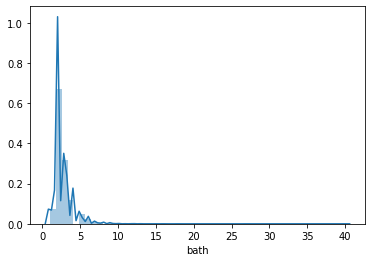

In [37]:
sns.distplot(df.bath)

In [38]:
df.groupby(['bath', 't_sqft']).price.mean().sort_values(ascending=False)

bath  t_sqft
13.0  7150.0    3600.00
5.0   8321.0    2806.00
6.0   8000.0    2800.00
7.0   9600.0    2736.00
8.0   4350.0    2600.00
                 ...   
2.0   418.0       11.50
1.0   395.0       10.25
2.0   470.0       10.00
1.0   340.0       10.00
      284.0        8.00
Name: price, Length: 2934, dtype: float64

### Guardar dataset cleaning

In [55]:
df.to_csv('home_price_cleaned.csv', index = False)

### Get Dummies

In [39]:
dummies = pd.get_dummies(df.location,drop_first=True )
dummies.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df = pd.concat([df, dummies], axis = 'columns')
df.shape

(13200, 247)

In [41]:
data = df.copy()
data.shape

(13200, 247)

### Variables dependiente e independiente

In [42]:
X = df.drop(['location', 'price', 'total_sqft'], axis= 'columns')
y = df.price
X.shape, y.shape

((13200, 244), (13200,))

### Spit the data

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

### Modelos

#### LinearRegression

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
lr.score(X_test, y_test)

0.4430410748026077

In [46]:
y_pred = lr.predict(X_test)

#### Rigde

In [55]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=6.89376e-17): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
rr_pred = rr.predict(X_test)

#### Lasso

In [71]:
from sklearn.linear_model import Lasso
la = Lasso()
la.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [72]:
la_pred = la.predict(X_test)

#### xgboost

In [83]:
import xgboost as xgb
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [84]:
xg_pred = xg.predict(X_test)

### Evaluacion de modelos

In [51]:
from sklearn import metrics

In [64]:
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Evaluación LinearRegressor')
print('--------------------------')
print('R2 score = ', round(r2,2))
print('MAE = ',round(mae, 2) )
print('RMSE = ', round(rmse, 2))
print('--------------------------')

Evaluación LinearRegressor
--------------------------
R2 score =  0.44
MAE =  12279.67
RMSE =  110.81
--------------------------


In [65]:
r2 = metrics.r2_score(y_test, rr_pred)
mae = metrics.mean_squared_error(y_test, rr_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rr_pred))
print('Evaluación Rigde')
print('--------------------------')
print('R2 score = ', round(r2,2))
print('MAE = ',round(mae, 2) )
print('RMSE = ', round(rmse, 2))
print('--------------------------')

Evaluación Rigde
--------------------------
R2 score =  0.44
MAE =  12281.5
RMSE =  110.82
--------------------------


In [73]:
r2 = metrics.r2_score(y_test, la_pred)
mae = metrics.mean_squared_error(y_test, la_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, la_pred))
print('Evaluación Lasso')
print('--------------------------')
print('R2 score = ', round(r2,2))
print('MAE = ',round(mae, 2) )
print('RMSE = ', round(rmse, 2))
print('--------------------------')

Evaluación Lasso
--------------------------
R2 score =  0.39
MAE =  13542.63
RMSE =  116.37
--------------------------


In [85]:
r2 = metrics.r2_score(y_test, xg_pred)
mae = metrics.mean_squared_error(y_test, xg_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, xg_pred))
print('Evaluación xgboost')
print('--------------------------')
print('R2 score = ', round(r2,2))
print('MAE = ',round(mae, 2) )
print('RMSE = ', round(rmse, 2))
print('--------------------------')

Evaluación xgboost
--------------------------
R2 score =  0.97
MAE =  780.21
RMSE =  27.93
--------------------------


**<font color=red>  El modelo con el mejor score para este tipo de problema es el xgboost, ya que tiene un R2 de 97%**

### Guardar el modelo

In [86]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as x:
    pickle.dump(xg,x)